In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

from sklearn.metrics import mean_absolute_error        # 평균 절대값 에러(모델 평가 지수)
from sklearn.metrics import mean_squared_error         # 평균 제곱근 에러(모델 평가 지수)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/Linear/power.csv'
data = np.loadtxt(filename, delimiter=',', dtype=np.float32)

In [4]:
# 정규화
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))
print(data.shape)
print(len(data) * 0.8)    # 데이터 나누기 위해서
print(data[ : 10])

(42870, 5)
34296.0
[[0.15492958 0.18518518 0.         0.         0.        ]
 [0.14084508 0.18518518 0.         0.         0.        ]
 [0.14084508 0.18518518 0.         0.         0.        ]
 [0.14084508 0.16666667 0.         0.         0.        ]
 [0.12676056 0.16666667 0.         0.         0.        ]
 [0.12676056 0.16666667 0.         0.         0.        ]
 [0.11267605 0.14814815 0.         0.         0.        ]
 [0.11267605 0.14814815 0.03640666 0.         0.00498274]
 [0.1971831  0.18518518 0.21297899 0.08799049 0.05658967]
 [0.26760563 0.2037037  0.322199   0.21284185 0.10285795]]


In [5]:
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]                 # 라벨(다음날 부터 마지막 샘플까지)
print(x_data.shape)
print(y_data.shape)

(42869, 5)
(42869,)


In [6]:
# 데이터 셋 만들기
x_train = x_data[ : 34296 ,  : ]         # 학습 데이터
y_train = y_data[ : 34296]

x_test = x_data[34296 : ,  : ]          # 테스트 데이터
y_test = y_data[34296 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34296, 5)
(34296,)
(8573, 5)
(8573,)


In [7]:
# 모델 만들기
model = Sequential()
model.add(Dense(1, input_dim = 5, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 학습 중 오차가 제일 적은 모델 저장 : model.h5
filename = '/content/drive/MyDrive/Colab Notebooks/Linear/model.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)

# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [9]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 / 라벨
epochs = 20, batch_size = 10,                   # 학습 회수 / 10개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/20
3430/3430 [==============================] - 10s 3ms/step - loss: 0.0276 - accuracy: 0.5511 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 2/20
  98/3430 [..............................] - ETA: 5s - loss: 0.0137 - accuracy: 0.5643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3430/3430 [==============================] - 8s 2ms/step - loss: 0.0109 - accuracy: 0.5520 - val_loss: 0.0304 - val_accuracy: 0.0000e+00
Epoch 3/20
3430/3430 [==============================] - 8s 2ms/step - loss: 0.0078 - accuracy: 0.5526 - val_loss: 0.0311 - val_accuracy: 1.1665e-04
Epoch 4/20
3430/3430 [==============================] - 6s 2ms/step - loss: 0.0065 - accuracy: 0.5529 - val_loss: 0.0312 - val_accuracy: 1.1665e-04


In [10]:
model.evaluate(x_test, y_test) # 모델 평가

# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

# 테스트 세트에 대한 평균 절댓값 오차
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print(mae)
print(mse)
print(rmse)

# RMSE 오차 확안
rmse = tf.sqrt(tf.reduce_mean(tf.square(y_test - predict)))
print("RMSE : ", rmse)

268/268 [==============================] - 0s 1ms/step
0.13250956
0.03122675
0.1767109234406501
RMSE :  tf.Tensor(0.33908424, shape=(), dtype=float32)


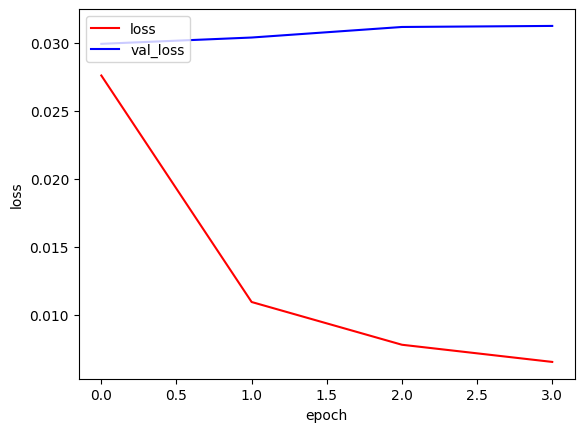

In [11]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

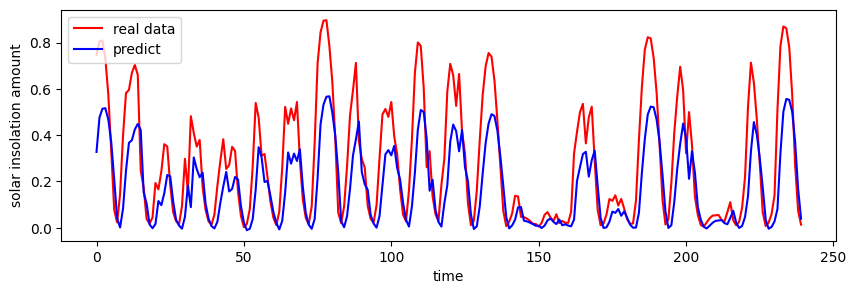

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 240], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 240], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()